# Total internal reflection

Now we use PyMoosh to illustrate a few things regarding total internal reflection: the evanescent wave in the lower index medium and the Goos-Hänchen effect, the first ever studied non-specular phenomenon (i.e. a phenomenon which can not be properly explained using just Snell's laws of reflection and refraction for a plane wave, because strange things may occur when you consider an incident beam instead of a plane wave).


## Critical angle

List of materials:
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 1.0


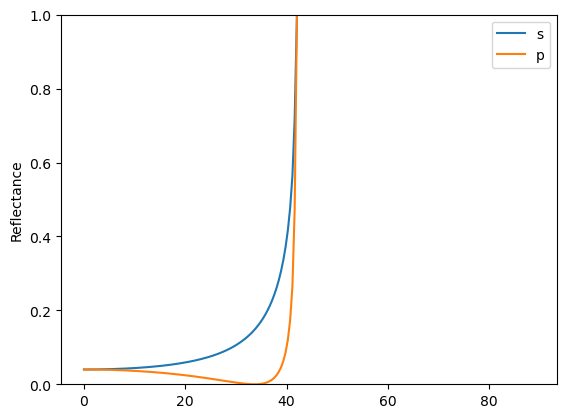

In [1]:
from PyMoosh import *
import matplotlib.pyplot as plt

wavelength=600

TIR=Structure([2.25,1.],[0,1],[20*wavelength,3*wavelength])

# For TE polarization
incidence,r,t,R,T=Angular(TIR,wavelength,0.,0.,89.,200)
# For TM polarization, same incidence angles
incidence,r_p,t_p,R_p,T_p=Angular(TIR,wavelength,1.,0.,89.,200)

# Visualization of the result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(incidence,R)
plt.plot(incidence,R_p)
plt.legend(["s","p"])

plt.ylabel('Reflectance')
plt.ylim(0,1)
plt.show()

The critical angle is at $\arcsin \frac{1}{1.5}=0.72973$ radians, or 41.81°. Above this critical angle, the reflectance is equal to 1, giving the impression that nothing interesting occurs here. But if you look at the phase of the reflection coefficient:

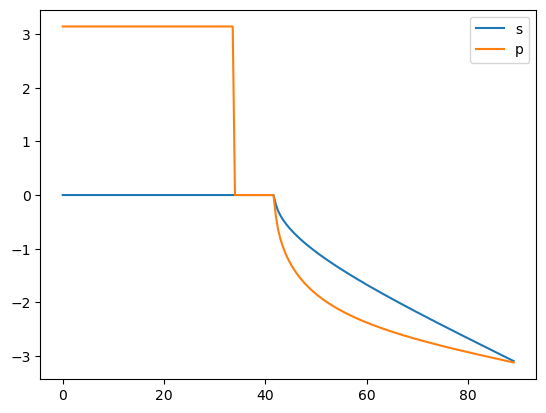

In [2]:
plt.figure(2)
plt.plot(incidence,np.angle(r))
plt.plot(incidence,np.angle(r_p))
plt.legend(["s","p"])


In $s$ polarization the coefficient is real and positive until the critical angle is reached. Above the critical angle the modulus is equal to 1 but the phase changes quickly. In $p$ polarization, the reflection coefficient as defined here is negative but real and changes sign at the Brewster incidence. Above the critical angle, the same phenomenon occurs. 

A swift variation of the phase is associated to a shift of an incident beam along the interface. Such a shift $\delta$ is given, for an asymptotically large beam (which means it's not accurate for narrow beams) by Artmann's formula:
$$\delta = -\frac{1}{n k_0 \cos \theta}\frac{\partial \varphi}{\partial \theta}$$
where $\phi$ is the phase of the reflection coefficient, $k_0= \frac{2\pi}{\lambda}$ and $\theta$ the angle of incidence. 

## Evanescent wave

Before illustrating the Goos-Hänchen effect, let's have a look at the field in the higher index medium, below the interface. First the module, seen from relatively far away.

Pixels horizontally: 1400
Incidence in degrees: 45.0
H//, TM, p polarization
Pixels vertically: 460


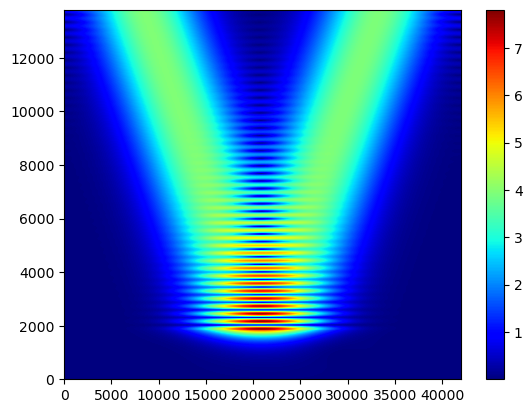

In [3]:
window=Window(70*wavelength,0.2,30.,30.)
beam=Beam(wavelength,45/180*np.pi,1,10*wavelength)

E=field(TIR,beam,window)

plt.figure(2)
plt.imshow(abs(E),cmap='jet',extent=[0,window.width,0,sum(TIR.thickness)],aspect='auto')
plt.colorbar()


The automatic resizing of the picture helps here, but does not allow to see how small the penetration length is.

List of materials:
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 1.0
Pixels horizontally: 1800
Pixels vertically: 420


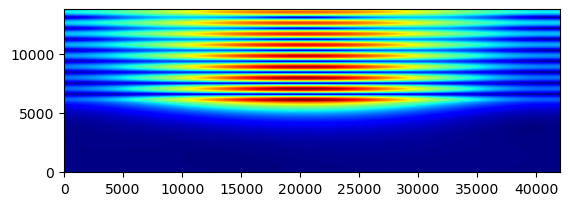

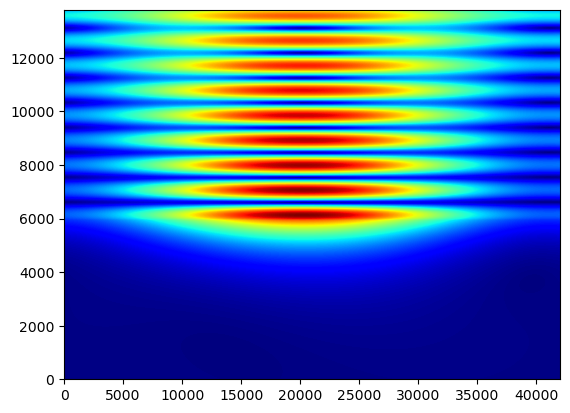

In [4]:
TIR2=Structure([2.25,1.],[0,1],[4*wavelength,3*wavelength])
window2=Window(30*wavelength,0.32,10,10)
E=field(TIR2,beam,window2)
plt.figure(3)
plt.imshow(abs(np.abs(E)),cmap='jet',extent=[0,window.width,0,sum(TIR.thickness)])
plt.figure(4)
plt.imshow(abs(np.abs(E)),cmap='jet',extent=[0,window.width,0,sum(TIR.thickness)],aspect='auto')


The zoom allows to see the nature of the evanescent wave below the interface : it does not propagate and the wavefronts are all vertical, perpendicular to the interface.

## Goos-Hänchen effect

The Goos-Hänchen is difficult to see just on the field map. At least, you have to compare two maps, one below the critical angle (well, here I obviously don't want to change the incidence angle so the substrate has to change) and one above. I hope you'll see the difference. 

For more advanced sudies of the non-specular effects like the Goos-Hänchen one, the profile of the incident and reflected beam have to be plotted. It is not difficult, but some modifications must be brought to PyMoosh in its present form to do that. One day, maybe...

List of materials:
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 1.1
Incidence in degrees: 42.8
E//, TE, s polarization
Pixels horizontally: 1600
Pixels vertically: 400
Pixels vertically: 460


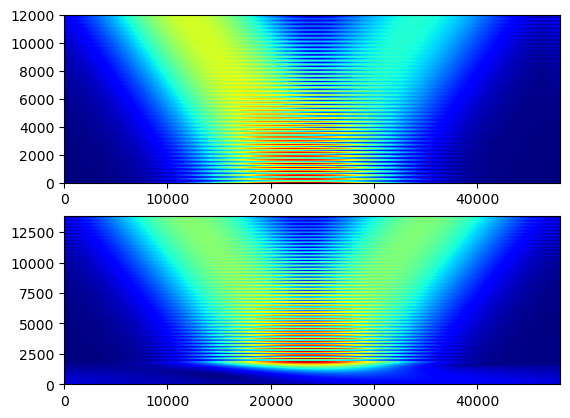

In [5]:
Pas_TIR=Structure([2.25,1.1],[0,1],[20*wavelength,0*wavelength])

beam=Beam(wavelength,42.8/180*np.pi,0,15*wavelength)
window=Window(80*wavelength,0.25,30.,30.)

E=field(Pas_TIR,beam,window)

F=field(TIR,beam,window)

plt.figure(2)
plt.subplot(2,1,1)
plt.imshow(abs(E),cmap='jet',extent=[0,window.width,0,sum(Pas_TIR.thickness)],aspect='auto')
plt.subplot(2,1,2)
plt.imshow(abs(F),cmap='jet',extent=[0,window.width,0,sum(TIR.thickness)],aspect='auto')


On the upper picture, there is a transmitted beam (not shown), and the reflectance is not as high as for the total internal reflection (lower picture) where the evanescent, carrying the energy in a direction paralell to the interface. The reflected beam is slightly displaced towards the right compare to the above picture.


## Frustrated total internal reflection

Now if we approach another high index medium at a distance close to the evanescent wave penetration depth, we see that it propagates again, so that, while we are above the critical angle, light passes through.

List of materials:
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 1.0
Incidence in degrees: 42.8
H//, TM, p polarization
Pixels horizontally: 1600
Pixels vertically: 610
List of materials:
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 1.0
Pixels horizontally: 4800
Incidence in degrees: 42.8
H//, TM, p polarization
Pixels vertically: 1260


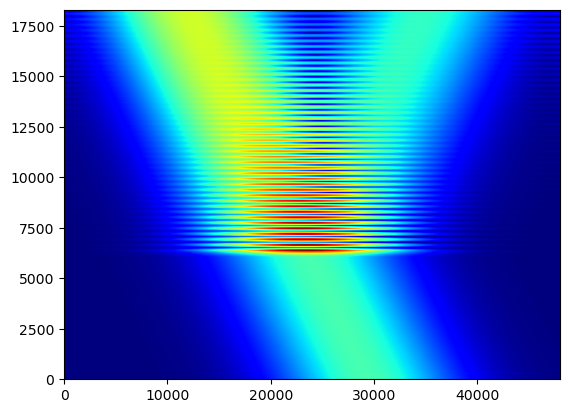

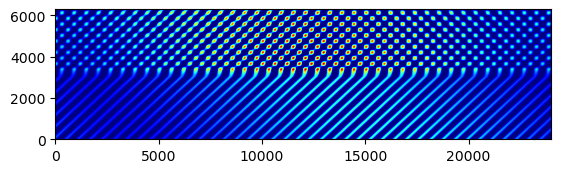

In [6]:
frustrated = Structure([2.25,1.],[0,1,0],[20*wavelength,0.5*wavelength,10*wavelength])
plt.figure(1)
beam=Beam(wavelength,42.8/180*np.pi,1,15*wavelength)
window=Window(80*wavelength,0.25,30.,30.)
E=field(frustrated,beam,window)
plt.imshow(abs(E),cmap='jet',extent=[0,window.width,0,sum(frustrated.thickness)],aspect='auto')

plt.figure(2)

frustrated = Structure([2.25,1.],[0,1,0],[5*wavelength,0.5*wavelength,5*wavelength])
window=Window(40*wavelength,0.4,5.,5.)
beam=Beam(wavelength,42.8/180*np.pi,1,15*wavelength)
E=field(frustrated,beam,window)
plt.imshow(np.real(E)*(np.real(E)>0),cmap='jet',extent=[0,window.width,0,sum(frustrated.thickness)])



The zoom below (and the  real imaginary part - well half of the wavefronts) show well how the wavefront of the evanescent, which are perpendicular to the interface are connected to the wavefronts of the propagative wave in the substrate. This illustrates the conservation of the component of the wavevector parallel to the interfaces across the different interfaces. 